## Predicting Review Stars based on text review - Linear SVM

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from collections import Counter

In [3]:
reviews_dataset = pd.read_csv('data/filtered_review.csv', low_memory= False)
reviews_dataset.head(3)

,business_id,stars,user_id,text,name,categories,attributes,city
0,YO8sWa0wYChH6DQWnE6NFg,4,djSJ6a9gsLSdj-7BoyNNQA,You're not gonna find a much better breakfast ...,P&G's Pamela's Diner,"Restaurants, Breakfast & Brunch","{'Alcohol': 'none', 'Ambience': ""{'romantic': ...",Pittsburgh
1,YO8sWa0wYChH6DQWnE6NFg,4,Tj58A0_D-WsD-UirmpYSEQ,"It's true. The pancakes here are incredible, ...",P&G's Pamela's Diner,"Restaurants, Breakfast & Brunch","{'Alcohol': 'none', 'Ambience': ""{'romantic': ...",Pittsburgh
2,YO8sWa0wYChH6DQWnE6NFg,1,lwCt_LgGAbPQpNRpaDR_Fg,Pamela's is not anything great (heavy and grea...,P&G's Pamela's Diner,"Restaurants, Breakfast & Brunch","{'Alcohol': 'none', 'Ambience': ""{'romantic': ...",Pittsburgh


In [4]:
reviews_dataset.count()

business_id    51864
stars          51864
user_id        51864
text           51864
name           51864
categories     51864
attributes     51864
city           51864
dtype: int64

#### Text preprocessing

In [5]:
import string
def get_clean_text(review):
    
    stopwords = nltk.corpus.stopwords.words('english')
    text = review
    
    text = text[2: len(review)-1].lower()  ##  case normalization
    
    text = text.replace('\\n', ' ').replace('\\t', ' ')
    
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    l = [word for word in nopunc.split() if word.lower() not in stopwords]
    clean_text = ""
    for word in l:
        clean_text += str(word)+" "
    
    return clean_text.strip()

In [6]:
def get_words(review):
  
    stopwords = nltk.corpus.stopwords.words('english')
    text = review
    
    text = text[2: len(review)-1].lower()  ##  case normalization
    
    text = text.replace('\\n', ' ').replace('\\t', ' ')
    
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    display(nopunc)
    
    l = [word for word in nopunc.split() if word.lower() not in stopwords]
    
    return l, len(l)

Test

In [7]:
sample_review = str(reviews_dataset.text[1])
test_1 = get_clean_text(sample_review)
test_1

'true pancakes incredible like pancakes ive little skeptical saw crepe pancakes full menu went regular hotcakes breakfast special menu like 4 incredible reviews described soft moist inside yet crispy outside ends good problem cleaning plate even need syrup husband got banana choc chip lot rich taste glad went regulars beyond beyond impressed'

In [8]:
test_2 = get_words(sample_review)
test_2

's true  the pancakes here are incredible and like no pancakes ive had before  i was a little skeptical when i saw the crepe pancakes on the full menu so went for the regular hotcakes on the breakfast special menu for only what like 4 they are just as incredible as all the other reviews have described  they are soft and moist on the inside yet crispy on the outside ends so good i did not have a problem cleaning my plate and they did not even need any syrup my husband got the banana choc chip which was a lot rich for my taste so was glad i went with the regulars beyond beyond impressed'

(['true',
  'pancakes',
  'incredible',
  'like',
  'pancakes',
  'ive',
  'little',
  'skeptical',
  'saw',
  'crepe',
  'pancakes',
  'full',
  'menu',
  'went',
  'regular',
  'hotcakes',
  'breakfast',
  'special',
  'menu',
  'like',
  '4',
  'incredible',
  'reviews',
  'described',
  'soft',
  'moist',
  'inside',
  'yet',
  'crispy',
  'outside',
  'ends',
  'good',
  'problem',
  'cleaning',
  'plate',
  'even',
  'need',
  'syrup',
  'husband',
  'got',
  'banana',
  'choc',
  'chip',
  'lot',
  'rich',
  'taste',
  'glad',
  'went',
  'regulars',
  'beyond',
  'beyond',
  'impressed'],
 52)

In [9]:
texts = []
stars = [reviews_dataset['stars'] for review in reviews_dataset]
for index, row in reviews_dataset.iterrows():
    texts.append(get_clean_text(row['text']))

In [10]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

# This vectorizer breaks text into single words and bi-grams
# and then calculates the TF-IDF representation
vectors = TfidfVectorizer(ngram_range=(1,3)).fit_transform(texts)

Wall time: 36.7 s


#### Splitting dataset into Train and test Date

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(vectors, stars[1], test_size=0.20, random_state=0, shuffle =False)

### Training model

In [12]:
%%time
from sklearn.svm import LinearSVC

# initialise the SVM classifier
classifier = LinearSVC()

# train the classifier
classifier.fit(X_train, Y_train)

Wall time: 10.5 s


### Predict

In [13]:
preds = classifier.predict(X_test)
print("Actual Ratings: ")
print(Y_test[:10].values)
print("Predicted Ratings: ")
print(preds[:10])

Actual Ratings: 
[5 4 5 4 5 5 5 4 5 5]
Predicted Ratings: 
[5 5 4 4 5 5 5 4 4 4]


### Evluating the model

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('Accuracy: ' + str(accuracy_score(Y_test, preds)))
print('Precision Score: ' + str(precision_score(Y_test, preds, average='weighted')))
print('Recall Score: '+ str(recall_score(Y_test,preds, average='weighted')))

Accuracy: 0.5430444423021306
Precision Score: 0.5578438852088291
Recall Score: 0.5430444423021306


In [15]:
import itertools
import matplotlib.pyplot as plt

from sklearn import svm, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

<Figure size 432x288 with 0 Axes>

Confusion matrix, without normalization
[[ 218  167  108   89   45]
 [  37  267  449  220   57]
 [   7   71  950 1113  137]
 [   4   10  237 2727  743]
 [   1    1   29 1215 1471]]


<Figure size 432x288 with 0 Axes>

Normalized confusion matrix
[[3.48e-01 2.66e-01 1.72e-01 1.42e-01 7.18e-02]
 [3.59e-02 2.59e-01 4.36e-01 2.14e-01 5.53e-02]
 [3.07e-03 3.12e-02 4.17e-01 4.89e-01 6.01e-02]
 [1.07e-03 2.69e-03 6.37e-02 7.33e-01 2.00e-01]
 [3.68e-04 3.68e-04 1.07e-02 4.47e-01 5.41e-01]]


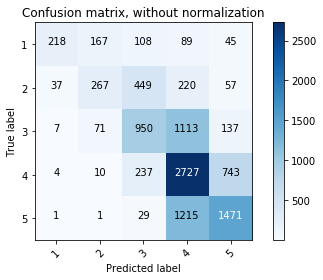

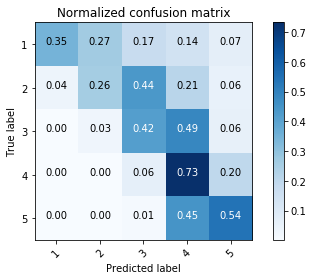

In [16]:
class_names = ['1','2','3','4','5']

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(Y_test, preds)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()